# Decision Tree – Credit Card Fraud Detection
This notebook applies a Decision Tree classifier to detect fraudulent transactions and compares its performance with Logistic Regression.

In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [5]:
credit_card_dataset = pd.read_csv("creditcard.csv")
X = credit_card_dataset.drop("Class", axis=1)
y = credit_card_dataset["Class"]

In [7]:

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,
                                                     random_state=42,
                                                     stratify=y) 

##model 1-Gini

In [20]:
dt_model1 = DecisionTreeClassifier(class_weight='balanced', random_state=42)    
dt_model1.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [21]:
##prediction
y_prediction= dt_model1.predict(X_test)

## Model Evaluation

In [22]:
print(confusion_matrix(y_test, y_prediction))
print(classification_report(y_test, y_prediction))

[[56830    34]
 [   27    71]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.68      0.72      0.70        98

    accuracy                           1.00     56962
   macro avg       0.84      0.86      0.85     56962
weighted avg       1.00      1.00      1.00     56962



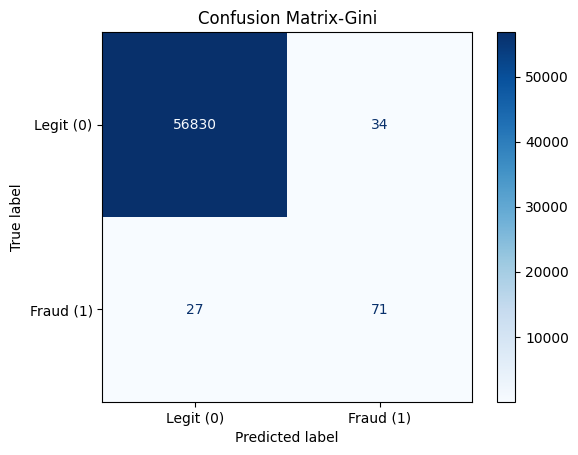

In [31]:
cm = confusion_matrix(y_test, y_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Legit (0)', 'Fraud (1)'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix-Gini')
plt.show()

In [ ]:
##model2:Entrop

In [24]:
dt_model2 = DecisionTreeClassifier(criterion="entropy",class_weight='balanced', random_state=42)    
dt_model2.fit(X_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [25]:
y_pred1=dt_model2.predict(X_test)

In [27]:
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[56838    26]
 [   22    76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.78      0.76        98

    accuracy                           1.00     56962
   macro avg       0.87      0.89      0.88     56962
weighted avg       1.00      1.00      1.00     56962



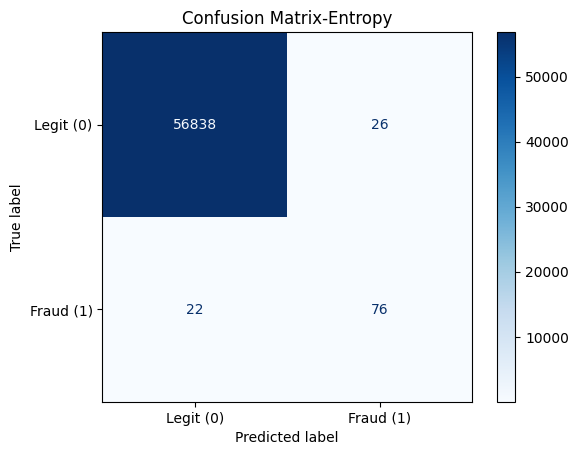

In [30]:
cm = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Legit (0)', 'Fraud (1)'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix-Entropy')
plt.show()

<h2 style="color:darkblue;">Decision Tree – Final Evaluation Summary</h2>

<p style="color:green;"><b>Model Variants Tested:</b></p>
<ul>
  <li>Decision Tree with <b>Gini</b> criterion</li>
  <li>Decision Tree with <b>Entropy</b> criterion</li>
</ul>

<p style="color:green;"><b>Key Observation:</b></p>
<ul>
  <li>
    Using <span style="color:blue;"><b>entropy</b></span> as the splitting criterion
    reduced <b>False Negatives</b> from
    <span style="color:red;"><b>27</b></span> to
    <span style="color:darkgreen;"><b>22</b></span>.
  </li>
</ul>

<p style="color:darkred;"><b>Interpretation:</b></p>
<p>
Reducing false negatives is critical in credit card fraud detection, as missed frauds lead to direct financial loss.
The entropy-based Decision Tree showed improved recall compared to the gini-based model, indicating better detection
of fraudulent transactions.
</p>

<p style="color:purple;"><b>Final Conclusion:</b></p>
<p>
Although entropy tuning improved the Decision Tree’s performance, the model still missed more fraud cases compared
to Logistic Regression. Therefore, Decision Tree was explored and evaluated as a comparison model but was not selected
as the final model for deployment.
</p>
